In [1]:
%load_ext autoreload
%autoreload 2
import os
import pandas as pd 
import openpyxl
import numpy as np
import re
from collections import deque, defaultdict
from unicodedata import normalize
import itertools
import math

from functools import reduce
import seaborn as sns
import matplotlib
# import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'IPAexGothic'
import numpy as np
plt.style.use('seaborn')
import japanize_matplotlib

In [2]:
curr_dir = os.path.realpath('.')

In [3]:
savepath = os.path.join('/home/barry/projects/nexco/toyota/data/MASTER_03')

In [4]:
master_filename = os.path.join(savepath, "マスタデータセット_230214結果_飯野修正版 v1.xlsx")

In [7]:
nenpi_df = pd.read_excel(master_filename, sheet_name="燃費_230118", skiprows=3) 

In [8]:
nenpi_df

No     年       燃料区分       型区分   モード   車名            通称名  \
0          0  2009  ガソリン乗用車燃費  普通／小型自動車  JC08  トヨタ           プリウス   
1          1  2009  ガソリン乗用車燃費  普通／小型自動車  JC08  トヨタ           プリウス   
2          2  2009  ガソリン乗用車燃費  普通／小型自動車  JC08  トヨタ             ｉＱ   
3          3  2009  ガソリン乗用車燃費  普通／小型自動車  JC08  トヨタ  エスティマ\nハイブリッド   
4          4  2009  ガソリン乗用車燃費  普通／小型自動車  JC08  トヨタ  エスティマ\nハイブリッド   
...      ...   ...        ...       ...   ...  ...            ...   
21976  12616  2022  ガソリン乗用車燃費     輸入自動車  JC08  ルノー         キャプチャー   
21977  12617  2022  ガソリン乗用車燃費     輸入自動車  JC08  ルノー         キャプチャー   
21978  12618  2022  ガソリン乗用車燃費     輸入自動車  JC08  ルノー         キャプチャー   
21979  12619  2022  ガソリン乗用車燃費     輸入自動車  JC08  ルノー           カングー   
21980  12620  2022  ガソリン乗用車燃費     輸入自動車  JC08   三菱          ミラージュ   

         ※全て半角にした(asc) ※前後の空白を除去した(trim)  ハイブリッドフラグ ガソリン/ハイブリッド  \
0                ﾌﾟﾘｳｽ             ﾌﾟﾘｳｽ       True      ハイブリッド   
1                ﾌﾟﾘｳｽ             ﾌﾟﾘｳｽ       True      ハイブリッド   
2                   iQ                iQ      False        ガソリン   
3      ｴｽﾃｨﾏ\nﾊｲﾌﾞﾘｯﾄﾞ   ｴｽﾃｨﾏ\nﾊｲﾌﾞﾘｯﾄﾞ       True      ハイブリッド   
4      ｴｽﾃｨﾏ\nﾊｲﾌﾞﾘｯﾄﾞ   ｴｽﾃｨﾏ\nﾊｲﾌﾞﾘｯﾄﾞ       True      ハイブリッド   
...                ...               ...        ...         ...   
21976          ｷｬﾌﾟﾁｬｰ           ｷｬﾌﾟﾁｬｰ      False        ガソリン   
21977          ｷｬﾌﾟﾁｬｰ           ｷｬﾌﾟﾁｬｰ      False        ガソリン   
21978          ｷｬﾌﾟﾁｬｰ           ｷｬﾌﾟﾁｬｰ      False        ガソリン   
21979            ｶﾝｸﾞｰ             ｶﾝｸﾞｰ      False        ガソリン   
21980           ﾐﾗｰｼﾞｭ            ﾐﾗｰｼﾞｭ      False        ガソリン   

                              原動機/型式 原動機/総排気量(L)     車両重量（kg）  燃費値（km/L）  \
0           1NZ\n（内燃機関） 3CM\n（電動\n機）       1.496  1260～\n1290       29.6   
1           1NZ\n（内燃機関） 3CM\n（電動\n機）       1.496  1280～\n1310       27.0   
2                                1KR       0.996          890       21.0   
3      2AZ\n（内燃機関） 2JM\n2FM\n(電動\n機）       2.362    1930～1990       18.0   
4      2AZ\n（内燃機関） 2JM\n2FM\n(電動\n機）       2.362    2000～2070       17.0   
...                              ...         ...          ...        ...   
21976                            H5F       1.197         1280       17.2   
21977                            H5H       1.333         1330       17.4   
21978                            H5H       1.333         1310       17.9   
21979                            H5F       1.197         1450       14.7   
21980                           3A92       1.192      900～910       22.8   

       1km走行におけるCO2排出量（g-CO2/km）  燃費値（km/L）※WLTC  \
0                      78.000000          24.864   
1                      86.000000          22.680   
2                     111.000000          17.640   
3                     129.000000          15.120   
4                     137.000000          14.280   
...                          ...             ...   
21976                 134.980233          14.448   
21977                 133.428736          14.616   
21978                 129.701676          15.036   
21979                 157.936054          12.348   
21980                 101.827193          19.152   

       1km走行におけるCO2排出量（g-CO2/km）※WLTC  
0                           92.857143  
1                          102.380952  
2                          132.142857  
3                          153.571429  
4                          163.095238  
...                               ...  
21976                      160.690753  
21977                      158.843733  
21978                      154.406757  
21979                      188.019112  
21980                      121.222849  

[21981 rows x 18 columns]

In [9]:
nenpi_df.columns

Index(['No', '年', '燃料区分', '型区分', 'モード', '車名', '通称名', '※全て半角にした(asc)',
       '※前後の空白を除去した(trim)', 'ハイブリッドフラグ', 'ガソリン/ハイブリッド', '原動機/型式',
       '原動機/総排気量(L)', '車両重量（kg）', '燃費値（km/L）', '1km走行におけるCO2排出量（g-CO2/km）',
       '燃費値（km/L）※WLTC', '1km走行におけるCO2排出量（g-CO2/km）※WLTC'],
      dtype='object')

In [73]:
float('4.99')

4.99

In [74]:
df = nenpi_df[['年', '※前後の空白を除去した(trim)', 'ガソリン/ハイブリッド', '原動機/総排気量(L)', '1km走行におけるCO2排出量（g-CO2/km）※WLTC' ]]

In [75]:
df

年 ※前後の空白を除去した(trim) ガソリン/ハイブリッド 原動機/総排気量(L)  \
0      2009             ﾌﾟﾘｳｽ      ハイブリッド       1.496   
1      2009             ﾌﾟﾘｳｽ      ハイブリッド       1.496   
2      2009                iQ        ガソリン       0.996   
3      2009   ｴｽﾃｨﾏ\nﾊｲﾌﾞﾘｯﾄﾞ      ハイブリッド       2.362   
4      2009   ｴｽﾃｨﾏ\nﾊｲﾌﾞﾘｯﾄﾞ      ハイブリッド       2.362   
...     ...               ...         ...         ...   
21976  2022           ｷｬﾌﾟﾁｬｰ        ガソリン       1.197   
21977  2022           ｷｬﾌﾟﾁｬｰ        ガソリン       1.333   
21978  2022           ｷｬﾌﾟﾁｬｰ        ガソリン       1.333   
21979  2022             ｶﾝｸﾞｰ        ガソリン       1.197   
21980  2022            ﾐﾗｰｼﾞｭ        ガソリン       1.192   

       1km走行におけるCO2排出量（g-CO2/km）※WLTC  
0                           92.857143  
1                          102.380952  
2                          132.142857  
3                          153.571429  
4                          163.095238  
...                               ...  
21976                      160.690753  
21977                      158.843733  
21978                      154.406757  
21979                      188.019112  
21980                      121.222849  

[21981 rows x 5 columns]

In [76]:
df.loc[df["原動機/総排気量(L)"] == '4.  99', "原動機/総排気量(L)"] = 4.99

In [77]:
df["原動機/総排気量(L)"] = [float(s) for s in df["原動機/総排気量(L)"]]

/tmp/ipykernel_29205/4083261410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["原動機/総排気量(L)"] = [float(s) for s in df["原動機/総排気量(L)"]]


In [78]:
df['count'] = 1

/tmp/ipykernel_29205/1365709263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count'] = 1


In [79]:
df.columns

Index(['年', '※前後の空白を除去した(trim)', 'ガソリン/ハイブリッド', '原動機/総排気量(L)',
       '1km走行におけるCO2排出量（g-CO2/km）※WLTC', 'count'],
      dtype='object')

In [80]:
gdf = df.groupby(['年', '※前後の空白を除去した(trim)', 'ガソリン/ハイブリッド', '原動機/総排気量(L)',]).agg({"count": sum, '1km走行におけるCO2排出量（g-CO2/km）※WLTC': 'mean'}).reset_index()

In [81]:
gdf = gdf[gdf['count'] > 1]

In [82]:
gdf = gdf.sort_values(by=['年', '※前後の空白を除去した(trim)', 'ガソリン/ハイブリッド', '原動機/総排気量(L)',])

In [83]:
gdf

年 ※前後の空白を除去した(trim) ガソリン/ハイブリッド  原動機/総排気量(L)  count  \
0     2009           AZ-ﾜｺﾞﾝ        ガソリン        0.658      7   
1     2009            GS450h      ハイブリッド        3.456      2   
2     2009            LS600h      ハイブリッド        4.968      2   
4     2009            RX450h      ハイブリッド        3.456      3   
9     2009          ※1 ﾗﾝﾃﾞｨ        ガソリン        1.997      2   
...    ...               ...         ...          ...    ...   
7079  2022             ﾜｺﾞﾝR        ガソリン        0.657      6   
7080  2022             ﾜｺﾞﾝR      ハイブリッド        0.657      4   
7081  2022             ﾜｺﾞﾝR      ハイブリッド        0.658      2   
7082  2022        ﾜｺﾞﾝR ｽﾏｲﾙ        ガソリン        0.657      5   
7083  2022        ﾜｺﾞﾝR ｽﾏｲﾙ      ハイブリッド        0.657      4   

      1km走行におけるCO2排出量（g-CO2/km）※WLTC  
0                         132.653061  
1                         212.500000  
2                         251.190476  
4                         167.460317  
9                         232.142857  
...                              ...  
7079                      100.005945  
7080                       92.808184  
7081                      102.857202  
7082                      103.868263  
7083                       96.236368  

[4643 rows x 6 columns]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.658 1.997 2.354 ... 1.997 0.657 0.657]
[132.65306122 232.14285714 248.80952381 ... 149.8406479  100.00594474
 103.86826341]
ガソリン 4021
[3.456 4.968 3.456 2.362 1.339 1.496 3.456 2.362 4.968 3.456 4.394 4.394
 1.496 1.797 3.456 2.362 4.968 3.456 1.339 2.362 1.339 1.797 4.394 4.394
 1.496 1.797 2.362 4.968 3.456 2.362 1.339 1.496 2.362 1.339 1.797 1.797
 2.979 4.394 2.979 4.394 1.496 1.797 3.456 2.362 4.968 3.456 1.496 2.362
 1.339 1.496 2.362 1.997 1.339 1.496 1.339 3.498 1.797 1.797 1.997 2.979
 2.979 1.496 1.797 3.497 2.493 3.456 2.362 4.968 3.456 1.496 1.496 2.362
 1.339 1.496 1.995 2.362 2.994 2.493 3.498 1.997 2.493 1.496 1.339 3.498
 1.797 1.797 1.997 2.979 2.979 3.497 3.497 2.994 0.658 0.658 1.496 1.797
 3.497 1.496 2.493 3.456 2.362 2.493 1.496 4.968 2.493 3.456 3.497 1.496
 1.496 1.496 1.997 2.493 1.995 1.997 2.362 2.493 2.493 3.498 0.658 1.997
 1.242 1.242 0.658 2.493 1.496 3.498 0.658 0.658 0.658 1.797 1.797 1.997
 0.658 1.496 1.797 3.497 1.496 1.496 1.496 2.493 3.456 2.362

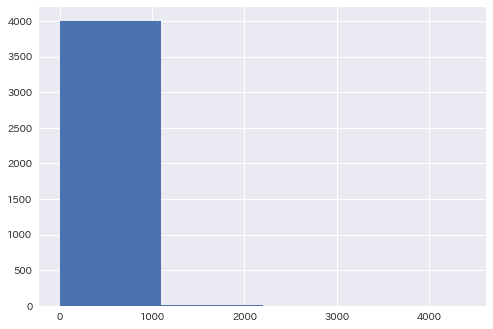

In [90]:
for engine_type in gdf['ガソリン/ハイブリッド'].unique():
    fig, ax = plt.subplots()
    _df = gdf[gdf["ガソリン/ハイブリッド"] == engine_type]
    x = _df["原動機/総排気量(L)"].values
    y =  _df["1km走行におけるCO2排出量（g-CO2/km）※WLTC"].values
    print(x)
    print(y)
    ax.hist(x, bins=4)
    print(engine_type, len(_df))

ax.legend()
# ax.set_xlim(0., 10)

In [102]:
ydf = df.groupby(by=["年", "※前後の空白を除去した(trim)", '原動機/総排気量(L)']).agg({'1km走行におけるCO2排出量（g-CO2/km）※WLTC': 'mean', 'count': sum}).reset_index()

In [105]:
zdf = df.groupby(by=["年", "※前後の空白を除去した(trim)", '原動機/総排気量(L)']).agg({'count': sum}).reset_index()

In [106]:
zdf

年 ※前後の空白を除去した(trim)  原動機/総排気量(L)  count
0     2009           AZ-ﾜｺﾞﾝ        0.658      7
1     2009            GS450h        3.456      2
2     2009            LS600h        4.968      2
3     2009           LS600hL        4.968      1
4     2009            RX450h        3.456      3
...    ...               ...          ...    ...
6839  2022           ﾛｰﾄﾞｽﾀｰ        1.496      3
6840  2022           ﾛｰﾄﾞｽﾀｰ        1.997      2
6841  2022             ﾜｺﾞﾝR        0.657     10
6842  2022             ﾜｺﾞﾝR        0.658      2
6843  2022        ﾜｺﾞﾝR ｽﾏｲﾙ        0.657      9

[6844 rows x 4 columns]

In [107]:
zdf['count'] = 1

In [108]:
zdf = zdf.groupby(by=["年", "※前後の空白を除去した(trim)",]).agg({'count': sum}).reset_index()

In [110]:
zdf = zdf[zdf['count'] > 1]

In [112]:
zdf.sort_values(by=['count'])

年            ※前後の空白を除去した(trim)  count
68    2010                           iQ      2
3905  2019                           XF      2
3907  2019  XJ Luxury/\n Premium Luxury      2
3912  2019                           XV      2
3920  2019                     ｱｳﾄﾗﾝﾀﾞｰ      2
...    ...                          ...    ...
2343  2016                     ﾎﾞﾙﾎﾞV70      4
2344  2016                    ﾎﾞﾙﾎﾞXC60      4
3397  2018                         ｸﾗｳﾝ      4
1447  2014                        ﾚｶﾞｼｨ      4
2259  2016                         ｸﾗｳﾝ      5

[726 rows x 3 columns]

In [130]:
names = zdf["※前後の空白を除去した(trim)"].unique()
years = sorted(zdf["年"].unique())

res = dict()
for year, name in zip(zdf["年"], zdf["※前後の空白を除去した(trim)"]) :
        if year not in res:
            res[year]= {"原動機/総排気量(L)": [], 
                        '1km走行におけるCO2排出量（g-CO2/km）※WLTC': []
                }
    
        _df = df[df["年"] == year]
        _df = _df[_df["※前後の空白を除去した(trim)"] == name]
        if _df.empty:
            continue
        assert len(_df) > 1
        r = []
        _df = _df.groupby(["年", "※前後の空白を除去した(trim)", "原動機/総排気量(L)"]).agg({'1km走行におけるCO2排出量（g-CO2/km）※WLTC': "mean"}).reset_index()
        if len(_df) == 1:
            continue
        for i in range(1, len(_df),):
            x, y = _df["原動機/総排気量(L)"].values[i-1:i+1]
            res[year]["原動機/総排気量(L)"].append((abs(y-x) / y))
            x, y = _df["1km走行におけるCO2排出量（g-CO2/km）※WLTC"].values[i-1:i+1]
            res[year]['1km走行におけるCO2排出量（g-CO2/km）※WLTC'].append(abs((y-x) / y))
        # break
    # break

In [131]:
res[2010]

{'原動機/総排気量(L)': [0.2505643340857788,
  0.2502502502502503,
  0.11592920353982293,
  0.19694533762057878,
  0.09914872308462702,
  0.15303094531581177,
  0.11592920353982293,
  0.16750139120756813],
 '1km走行におけるCO2排出量（g-CO2/km）※WLTC': [0.0,
  0.1685267857142855,
  0.22758620689655182,
  0.18518518518518498,
  0.06011730205278583,
  0.0707762557077626,
  0.020722891566265063,
  0.061224489795918415]}

In [137]:
savefolder = "/home/barry/projects/nexco/toyota/data/変動"

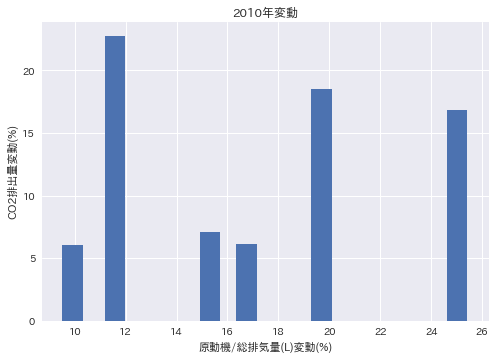

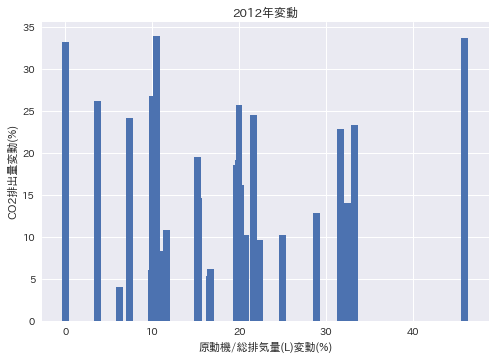

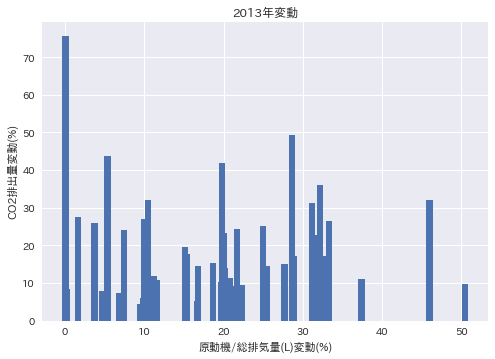

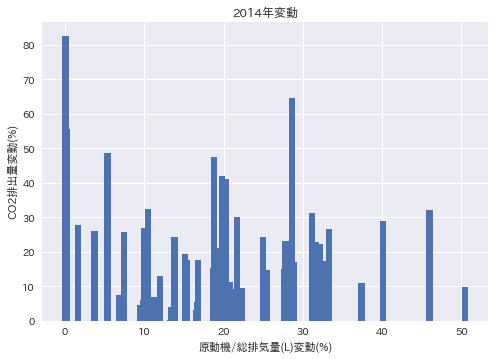

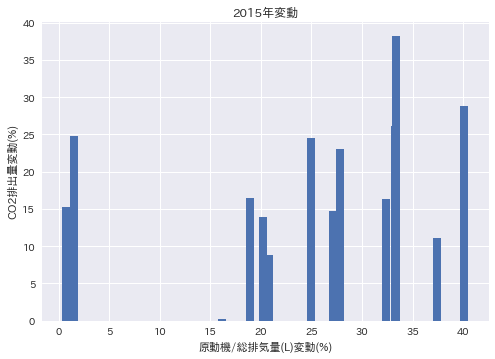

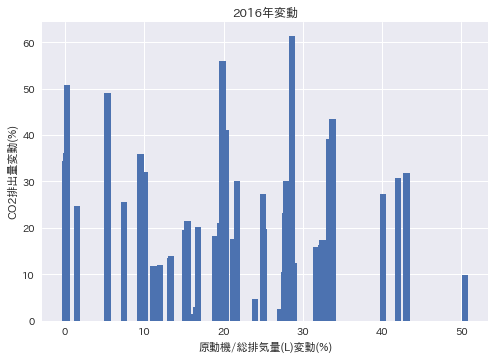

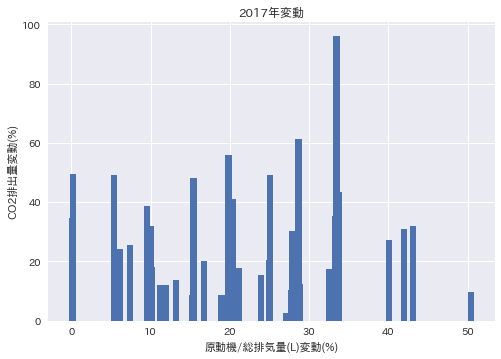

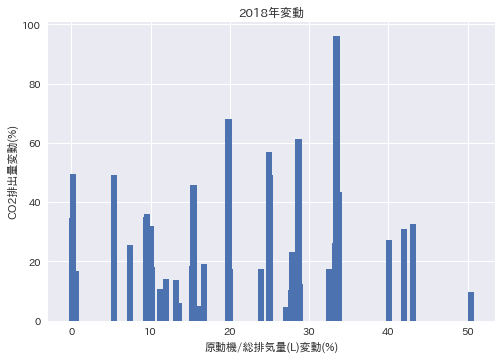

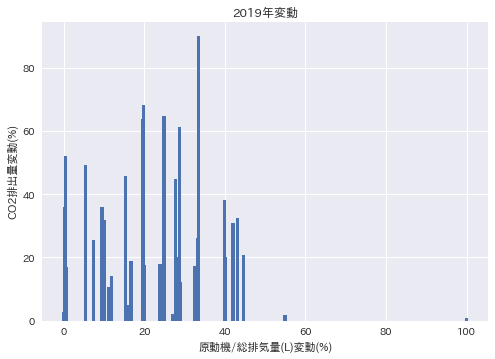

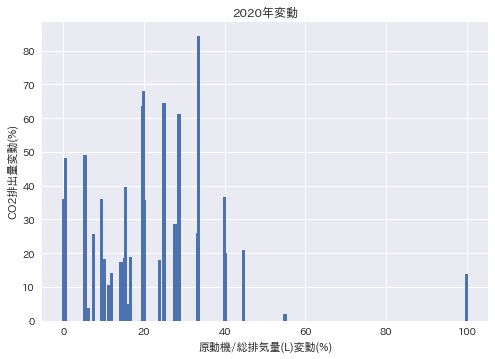

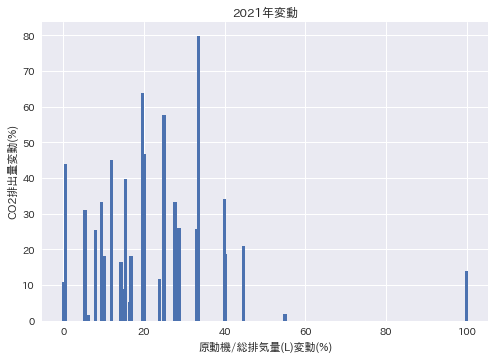

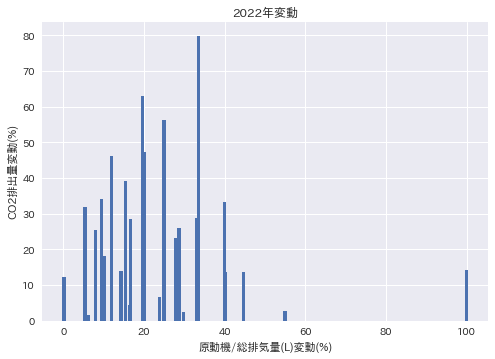

In [138]:

for year in res:
    fig, ax = plt.subplots()
    x = np.array(res[year]['原動機/総排気量(L)']) * 100.0
    y = np.array(res[year]['1km走行におけるCO2排出量（g-CO2/km）※WLTC']) * 100.0

    ax.bar(x, y)
    ax.set_xlabel('原動機/総排気量(L)変動(%)')
    ax.set_ylabel('CO2排出量変動(%)')
    ax.set_title(f"{year}年変動")
    fig.savefig(os.path.join(savefolder, f"{year}年変動.png"))



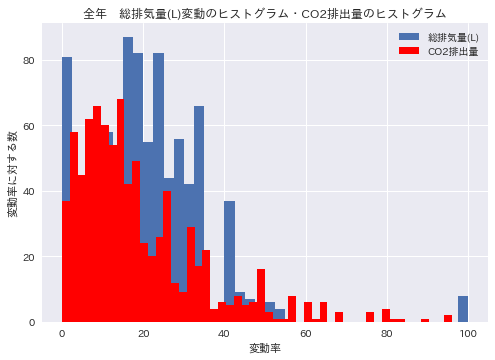

In [151]:
x = []

y = []
for year in res:
    x += [np.array(res[year]['原動機/総排気量(L)']) * 100.0]
    y += [np.array(res[year]['1km走行におけるCO2排出量（g-CO2/km）※WLTC']) * 100.0]

x = np.concatenate(x, -1)
y = np.concatenate(y, -1)


fig, ax = plt.subplots()

ax.hist(x, 40, label="総排気量(L)")
ax.hist(y, 50, color="red", label="CO2排出量")
ax.set_title(f'全年　総排気量(L)変動のヒストグラム・CO2排出量のヒストグラム')
ax.legend()
ax.set_xlabel("変動率")
ax.set_ylabel("変動率に対する数")


fig.savefig(os.path.join(savefolder, f'全年　総排気量(L)変動のヒストグラム・CO2排出量のヒストグラム.png'))


    # ax.set_xlabel('原動機/総排気量(L)変動(%)')
    # ax.set_ylabel('CO2排出量変動(%)')
    # ax.set_title(f"{year}年変動")



In [154]:
names = zdf["※前後の空白を除去した(trim)"].unique()


res = dict()
for year, name in zip(zdf["年"], zdf["※前後の空白を除去した(trim)"]) :
        if year not in res:
            # if len(res):
            #     print(res)
            #     raise Exception
            res[year]= {"原動機/総排気量(L)": defaultdict(list), 
                        '1km走行におけるCO2排出量（g-CO2/km）※WLTC': defaultdict(list)
                }

    
        _df = df[df["年"] == year]
        _df = _df[_df["※前後の空白を除去した(trim)"] == name]
        if _df.empty:
            continue
        assert len(_df) > 1
        r = []
        _df = _df.groupby(["年", "※前後の空白を除去した(trim)", "原動機/総排気量(L)"]).agg({'1km走行におけるCO2排出量（g-CO2/km）※WLTC': "mean"}).reset_index()
        if len(_df) == 1:
            continue
        
        for i in range(1, len(_df),):
            x, y = _df["原動機/総排気量(L)"].values[i-1:i+1]
            res[year]["原動機/総排気量(L)"][name].append((abs(y-x) / y))
            x, y = _df["1km走行におけるCO2排出量（g-CO2/km）※WLTC"].values[i-1:i+1]
            res[year]['1km走行におけるCO2排出量（g-CO2/km）※WLTC'][name].append(abs((y-x) / y))
        # break
    # break

In [156]:
res[2017]

{'原動機/総排気量(L)': defaultdict(list,
             {'208': [0.24968710888610762],
              '308': [0.24968710888610762],
              '500､ 500C': [0.2782258064516129],
              'BMW 220i': [0.0005005005005004454],
              'BMW 320i ｸﾞﾗﾝﾂｰﾘｽﾓ': [0.0005005005005004454],
              'BMW 420i': [0.0005005005005004454],
              'BMW 420i ｸﾞﾗﾝ ｸｰﾍﾟ': [0.0005005005005004454],
              'C-HR': [0.3344462993878687],
              'CX-5': [0.19734726688102888],
              'F-TYPE': [0.40108021604320854],
              'WRX': [0.0020020020020020037],
              'XE': [0.3326653306613227],
              'XF': [0.3326653306613227],
              'XJ Luxury/\n Premium Luxury': [0.3326653306613227],
              'ヴｨｯﾂ': [0.2505643340857788, 0.11163101604278078],
              'ｱｲｼｽ': [0.09516616314199398],
              'ｱｳﾄﾗﾝﾀﾞｰ': [0.15303094531581177],
              'ｱｸｾﾗ': [0.2508763144717076],
              'ｱﾃﾝｻﾞ': [0.19734726688102888],
              'ｱﾙﾌｧｰﾄﾞ\

In [158]:
0.24/0.21

1.1428571428571428